In [21]:
import pandas as pd

housing_train=pd.read_csv('dataset/train.csv')
initial_shape=housing_train.shape
print(initial_shape)

(1460, 81)


In [3]:
#Function for A.1. Dropping columns having more than 70% of null or na values
def drop_columns_with_70_per_null(df):
    null_count_featues_dict=df.isnull().sum().to_dict()
    for k,v in null_count_featues_dict.items():
        if v!=0 and v/df.shape[0] > .70:
            df.drop(columns=[k],inplace=True)
    return df
    
    

In [4]:
#A. Handling missing quantitative values

#populating LotFrontage by median as it more robust and less sensitive to outliers, quantative value
housing_train['LotFrontage'].fillna(value=housing_train['LotFrontage'].median(),inplace=True)

#MasVnrArea - filling missing values is dependent on MasVnrType as per dataset (when the value of MasVnrType is None, MasVnrArea is zero)
#But as the both vlues are NA it is better to just delete as its a small number as 8. (Also I see these houses are very old from 1975)
housing_train=housing_train[pd.notnull(housing_train['MasVnrArea'])]

#GarageYrBlt - filling by median
housing_train['GarageYrBlt'].fillna(value=housing_train['GarageYrBlt'].median(),inplace=True)

#final check for quantitative values
print("Missing numerical values in dataframe : {}".format(housing_train.select_dtypes(exclude='object').isnull().sum().sum()))

print(housing_train.shape)
housing_train.head()




Missing numerical values in dataframe : 0
(1452, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:


#A. Handling categorical features

#A.1. Dropping columns having more than 70% of null or na values, as they do not contribute for prediction
housing_train_A1=drop_columns_with_70_per_null(housing_train) #dropped 4 columns
print ('columns dropped after "A.1. Dropping columns having more than 70% of null or na values"  = {}'.format(initial_shape[1]-housing_train_A1.shape[1]))
shape_1=housing_train_A1.shape
print(shape_1)
#housing_train_A1.select_dtypes(include='object').isna().any().tolist()
#housing_train_A1.select_dtypes(include='object').isnull().sum()




columns dropped after "A.1. Dropping columns having more than 70% of null or na values"  = 4
(1452, 77)


In [6]:
#A.2 checking if any feature have more than 100 unique values as it can add to many dimensions if one hot coding is done

max_dimensions=100
for col in housing_train_A1.select_dtypes(include='object').columns:
   print(col,housing_train_A1[col].nunique())
   if housing_train_A1[col].nunique() > max_dimensions:
        print ("dropped : {}".format(col))
        housing_train_A1.drop(columns=[col],inplace=True)
print(housing_train_A1.shape)
#No columns were dropped in this scenario, but this is very critical check otherwise we will end up adding 100's of new columns

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6
(1452, 77)


In [6]:
'''
Thinking for this approach but not sure as of now

#B.1 Approach we are trying to use is predicting the missing values using KNN algorithm, as it seems to be the
#most suitable approach rather than just keeping the unkown or deleting some values

from sklearn.neighbors import KNeighborsClassifier
import math

train=housing_train_A1[housing_train_A1['FireplaceQu'].notnull()]
test=housing_train_A1[housing_train_A1['FireplaceQu'].isnull()]
#train_x=train.drop(columns=['id','FireplaceQu'])

if y.shape[0]+x.shape[0] == shape_1[0]:
    print("No missing data")

#Deciding kvalue by sqrt of n and keeping it odd
k= math.floor(math.sqrt(x.shape[0])) if math.floor(math.sqrt(x.shape[0])) % 2 !=0 else math.ceil(math.sqrt(x.shape[0])) 
print("k-value for KNN: {}".format(k))
train_x=train.drop(columns=['Id','FireplaceQu'])
train_y=train['FireplaceQu']
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_x,train_y)

#knn_impute(target=df['Age'], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)
'''

'\nThinking for this approach but not sure as of now\n\n#B.1 Approach we are trying to use is predicting the missing values using KNN algorithm, as it seems to be the\n#most suitable approach rather than just keeping the unkown or deleting some values\n\nfrom sklearn.neighbors import KNeighborsClassifier\nimport math\n\ntrain=housing_train_A1[housing_train_A1[\'FireplaceQu\'].notnull()]\ntest=housing_train_A1[housing_train_A1[\'FireplaceQu\'].isnull()]\n#train_x=train.drop(columns=[\'id\',\'FireplaceQu\'])\n\nif y.shape[0]+x.shape[0] == shape_1[0]:\n    print("No missing data")\n\n#Deciding kvalue by sqrt of n and keeping it odd\nk= math.floor(math.sqrt(x.shape[0])) if math.floor(math.sqrt(x.shape[0])) % 2 !=0 else math.ceil(math.sqrt(x.shape[0])) \nprint("k-value for KNN: {}".format(k))\ntrain_x=train.drop(columns=[\'Id\',\'FireplaceQu\'])\ntrain_y=train[\'FireplaceQu\']\nmodel = KNeighborsClassifier(n_neighbors=k)\nmodel.fit(train_x,train_y)\n\n#knn_impute(target=df[\'Age\'], attribu

In [7]:
#B Handling missing categorical values
#As of now putting unknown class to all features as U1,U2 ... Un for features F1,F2 ... Fn where Fi are having any missing values
#The idea of populating the missing classes ot labels so that we can proceed with one hot encoding. And can revisit these 
#columns if the preidiction accuracy is good

#columns having null values
housing_train_A1_cat=housing_train_A1.select_dtypes(include='object')
nan_columns=housing_train_A1_cat.columns[housing_train_A1_cat.isna().any()].tolist()

for iter,cat in enumerate(nan_columns):
    unknown_class_name="U"+str(iter)
    print (iter,cat,unknown_class_name)
    housing_train_A1[cat].fillna(value=unknown_class_name,inplace=True)

housing_train_A1.select_dtypes(include='object').isnull().sum()

0 BsmtQual U0
1 BsmtCond U1
2 BsmtExposure U2
3 BsmtFinType1 U3
4 BsmtFinType2 U4
5 Electrical U5
6 FireplaceQu U6
7 GarageType U7
8 GarageFinish U8
9 GarageQual U9
10 GarageCond U10


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [8]:
'''

if feature_null.shape[0]+feature_notnull.shape[0] == shape_1[0]:
    print("No missing data")
enc.fit(feature_notnull[['FireplaceQu']])
enc.categories_
sparse_out=enc.transform(feature_notnull[['FireplaceQu']])
print(sparse_out)

feature_notnull.head()

one_category_df=housing_train_A1.drop(columns=housing_train_A1.select_dtypes(include='object').drop(columns=['FireplaceQu']).columns)
feature_notnull=one_category_df[housing_train_A1.FireplaceQu.notnull()]
feature_null=one_category_df[housing_train_A1.FireplaceQu.isnull()]
if feature_null.shape[0]+feature_notnull.shape[0] == shape_1[0]:
    print("No missing data")
enc.fit(feature_notnull)
enc.categories_
sparse_out=enc.transform(feature_notnull)
print(sparse_out)
'''

'\n\nif feature_null.shape[0]+feature_notnull.shape[0] == shape_1[0]:\n    print("No missing data")\nenc.fit(feature_notnull[[\'FireplaceQu\']])\nenc.categories_\nsparse_out=enc.transform(feature_notnull[[\'FireplaceQu\']])\nprint(sparse_out)\n\nfeature_notnull.head()\n\none_category_df=housing_train_A1.drop(columns=housing_train_A1.select_dtypes(include=\'object\').drop(columns=[\'FireplaceQu\']).columns)\nfeature_notnull=one_category_df[housing_train_A1.FireplaceQu.notnull()]\nfeature_null=one_category_df[housing_train_A1.FireplaceQu.isnull()]\nif feature_null.shape[0]+feature_notnull.shape[0] == shape_1[0]:\n    print("No missing data")\nenc.fit(feature_notnull)\nenc.categories_\nsparse_out=enc.transform(feature_notnull)\nprint(sparse_out)\n'

In [8]:
#C. OneHotEncoder to bring categorical values to numerical scale

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
df_transformed=enc.fit_transform(housing_train_A1.select_dtypes(include='object')).toarray()

print("transformed df : {}" .format(df_transformed.shape))
print(type(df_transformed))
new_housing_train=pd.DataFrame(data=df_transformed)
print(type(new_housing_train))
print(new_housing_train.shape)
new_housing_train.head()
full_housing_train=pd.concat([housing_train_A1,new_housing_train],axis=1,join="inner")
print("after concat : {}" .format(full_housing_train.shape))
#generating categorical column list
cat_features= housing_train_A1.dtypes==object
cat_col=[]
for colu in housing_train_A1.select_dtypes(include='object').columns:
    cat_col.append(colu)

#deleting old original columns
full_housing_train.drop(columns=cat_col,inplace=True)

#deleting id column as it does not have any significance
full_housing_train.drop(columns='Id',inplace=True)

print(full_housing_train.shape)



transformed df : (1452, 250)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
(1452, 250)
after concat : (1444, 327)
(1444, 287)


In [9]:
'''techniques for dimension reduction
1. check corr and select one of the two features if correlation is high
2. check p-value, with alternate hypothesis as there is relation between the given two attributes
3. PCA
'''
import seaborn as sns
import numpy as np

cor=full_housing_train.corr()
#sns.heatmap(cor)
cor_abs=cor.abs()
print(cor_abs.shape)
columns = np.full((cor.shape[0],), True, dtype=bool)
#cor_abs
columns

(287, 287)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
#taking predictor at first position
SalePrice = full_housing_train['SalePrice']
full_housing_train.drop(labels=['SalePrice'], axis=1,inplace = True)
full_housing_train.insert(0, 'SalePrice', SalePrice)
full_housing_train.head()


for i in range(cor_abs.shape[0]):
    for j in range(i+1,cor_abs[0].shape[0]):
        if cor_abs.iloc[i][j] > 0.7:
            #print(cor_abs[i][j])
            if columns[j]:
                columns[j]=False

true_columns=full_housing_train.columns[columns]
full_housing_train=full_housing_train[true_columns]


#full_housing_train.shape
#Correlation reduced 12 features keeping the threshold as 0.7(This threshold is configurable and we an change based on prediction accuracy)

In [14]:
#If we want to use the multiple linear regresson model, we are checking the linear relaton of predictor with the independent variables
cor_abs[0].shape[0]
full_housing_train_multi_var=full_housing_train.copy(deep=True)

'''
H0: There is no relation between Y and X
Ha: Y i depedent on X
if pvalue is less than significance level then reject null hypotheses

i.e. if pvalue > 0.05 we do need the columns

'''
import statsmodels.api as sm

y=full_housing_train_multi_var.iloc[:,0]
X=full_housing_train_multi_var.iloc[:,1:]

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\akash\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 41, 53, 93, 101, 103, 146, 149, 176, 194, 195]


In [22]:
#We can say that this technique has reduced the error of Linear regression by significant number but still not to the par.

#Applying multiple linear regression model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#1. Make feature matrix and predictor separate
y=full_housing_train_multi_var.iloc[:,0].values
X=full_housing_train_multi_var[selected_features_BE].values

#2. train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#3. Model
regressor = LinearRegression()  

#4. Training
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19616.941687116112
Mean Squared Error: 633229542.2057436
Root Mean Squared Error: 25164.052579140418


In [23]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-993090.513876671
[-1.69963891e+02  2.64591832e-01  1.67748751e+04  3.23596133e+03
  2.74106605e+02  2.12424092e+02  3.43120876e+01  7.36857907e+00
  6.82321824e+00  4.78188336e+01  4.56455857e+01  9.55692054e+03
  5.29165555e+03 -1.05909800e+04 -1.86824573e+04  5.85160202e+03
  3.19446762e+03  1.19708396e+04  2.84850261e+01  5.91709211e+01
 -1.52731861e+04 -2.37556910e+04  4.52905759e+04  1.46007625e+05
 -8.37245464e+03 -6.62386476e+03 -1.20516304e+04 -3.17537894e+04
 -1.06942541e+04 -1.00587203e+04]


In [24]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,252000,270237.398911
1,297000,293808.146148
2,127000,119634.166237
3,149900,141696.131874
4,195000,201812.131681


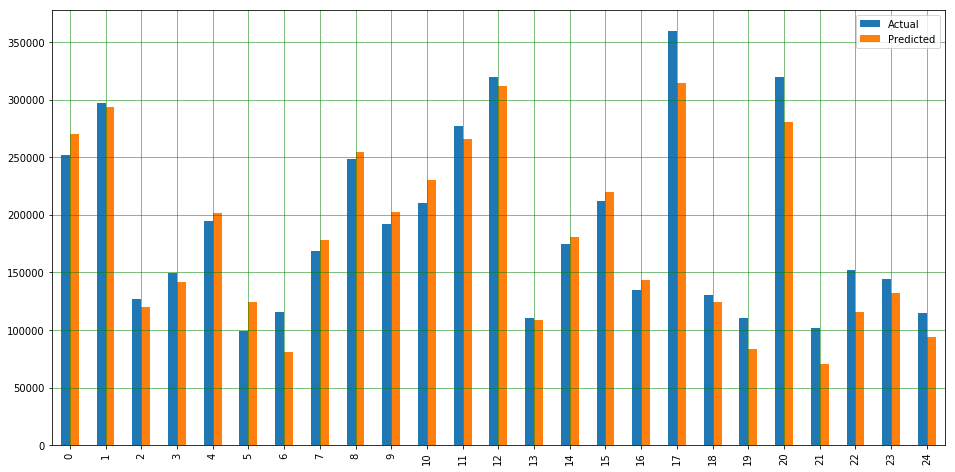

In [79]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
#X_train, X_test, y_train, y_test
#train RF regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

RAND_STATE = 42

forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 133545907.400, test: 587204507.240
Random Forest R^2 train: 0.980, test: 0.891


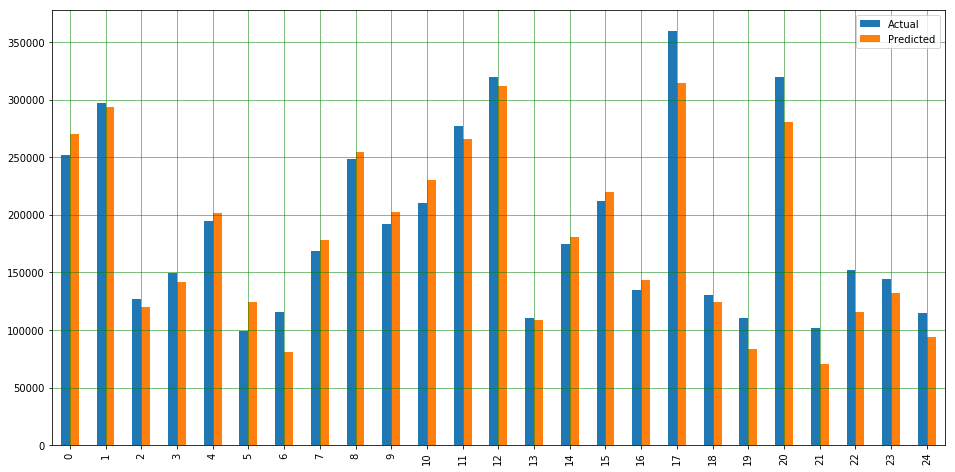

In [80]:
#Plot barplot for actual vs predicted
df_rf= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_test_preds.flatten()})


df_rf = df.head(25)
df_rf.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [66]:

y=full_housing_train_multi_var.iloc[:,0]
X=full_housing_train_multi_var.iloc[:,1:]

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 210921.041099
Best score using built-in LassoCV: 0.724739


In [67]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 263 variables


Text(0.5,1,'Feature importance using Lasso Model')

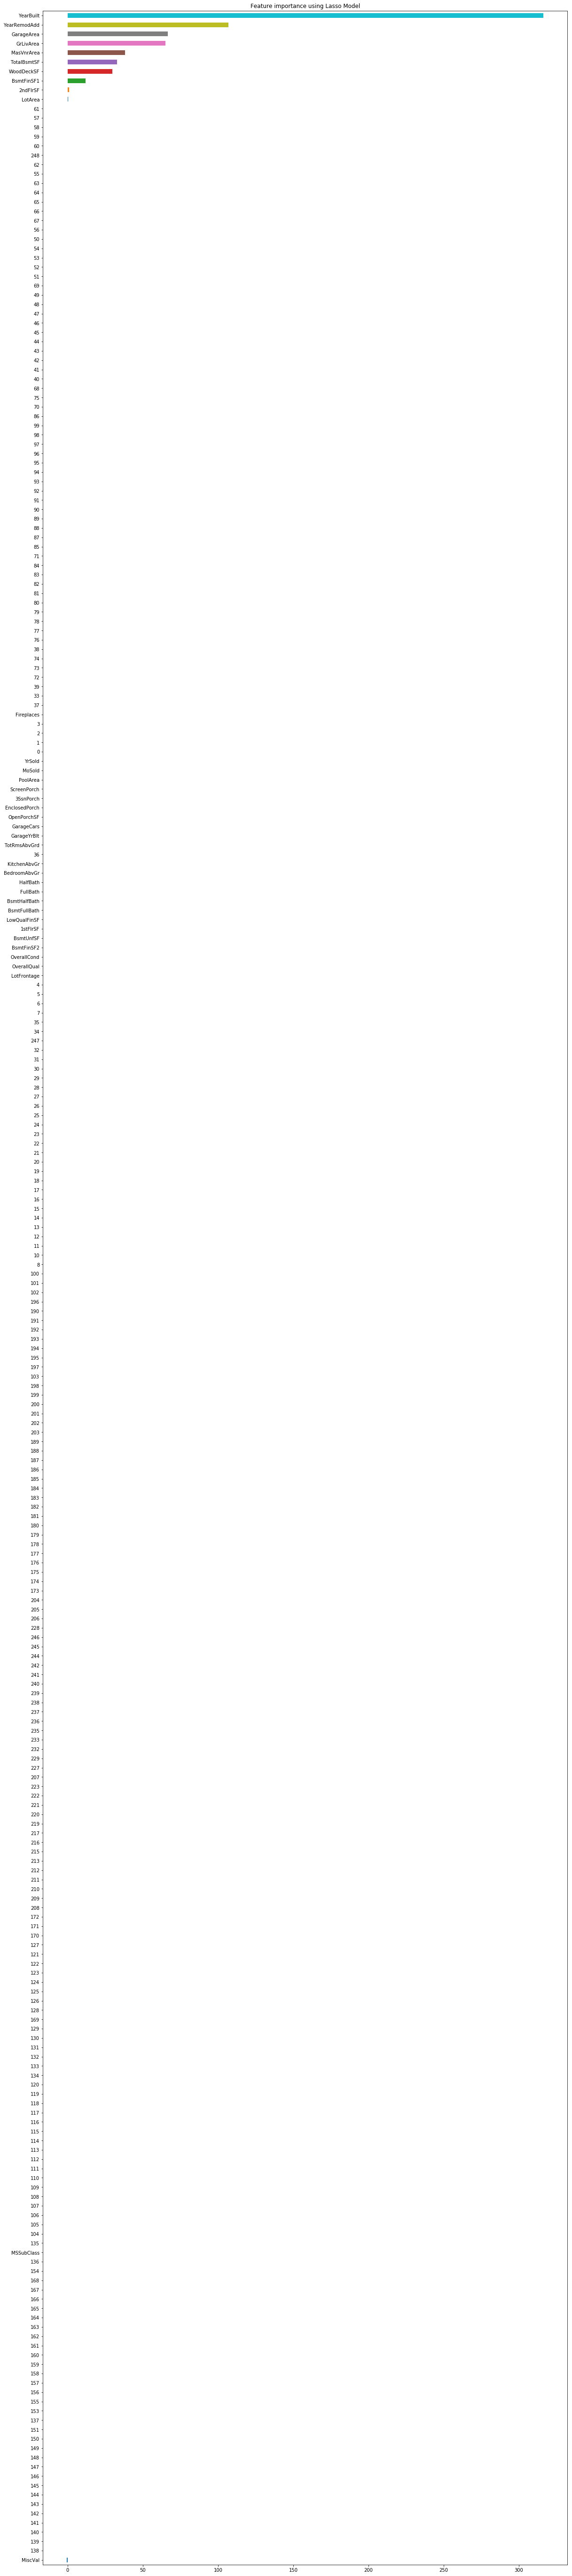

In [68]:

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [78]:
coef != 0

MSSubClass       False
LotFrontage      False
LotArea           True
OverallQual      False
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF          True
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea        True
WoodDeckSF        True
OpenPorchSF      False
EnclosedPorch    False
                 ...  
210              False
211              False
212              False
213              False
215              False
216              False
217              False
219              False
220              False
221              False
222              False
223              False
227        

In [82]:
#same for Random forest, this is because random forest automatically do feature selection and make the coefficient zero for the
#unwanted features

#X_train, X_test, y_train, y_test
#train RF regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

full_housing_train_multi_var[selected_features_BE]

#1. Make feature matrix and predictor separate
y=full_housing_train_multi_var.iloc[:,0].values
X=full_housing_train_multi_var[selected_features_BE].values

#2. train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

RAND_STATE = 42

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 148461011.882, test: 570827310.051
Random Forest R^2 train: 0.977, test: 0.894


In [86]:
#Lasso

from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

lasso = Lasso()
lasso.fit(X_train, y_train.squeeze())
#calculate scores for the model
y_train_preds = lasso.predict(X_train)
y_test_preds = lasso.predict(X_test)

print('Lasso Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Lasso Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Lasso Regression MSE train: 1265541167.084, test: 633010946.805
Lasso Regression R^2 train: 0.806, test: 0.883


In [1]:
#Lasso CV

from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


lasso = LassoCV(cv = 10)
lasso.fit(X_train, y_train.squeeze())
#calculate scores for the model
y_train_preds = lasso.predict(X_train)
y_test_preds = lasso.predict(X_test)

print('Lasso Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Lasso Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))


NameError: name 'X_train' is not defined